# 实现简单的二维卷积

- 输入（H, W, C)


- 卷积核 （KH, KW, C)


- 时间复杂度 $Time - O(H * W * KH * KW * C)$

In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [2]:
def conv2d(img, kernel):
    height, width, in_channels = img.shape
    kernel_height, kernel_width, in_channels, out_channels = kernel.shape
    out_height = height - kernel_height + 1
    out_width = width - kernel_width + 1
    feature_maps = np.zeros(shape=(out_height, out_width, out_channels))
    for oc in range(out_channels):              # Conv with each kernel
        for h in range(out_height):             # Scan height
            for w in range(out_width):          # Scan width
                patch = img[h: h + kernel_height, w: w + kernel_width, :]
                feature_maps[h, w, oc] = np.sum(patch * kernel[:, :, :, oc])

    return feature_maps

In [3]:
img = cv2.imread('s.png')
kernel_height = 15
kernel_width = 15
in_channels = 3
out_channels = 3
# kernel = np.random.randint(0, 9, size=(kernel_height, kernel_width, in_channels, out_channels))
kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel = np.array([kernel, kernel, kernel])
kernel = np.array([kernel, kernel, kernel])
kernel = np.transpose(kernel, axes=(3, 2, 1, 0))

## Sobel Operator

- X 方向检测

$$
\begin{bmatrix}
1 & 2 & 1 \\[1ex]
0 & 0 & 0 \\[1ex]
-1 & -2 & -1
\end{bmatrix}
$$

- Y 方向检测

$$
\begin{bmatrix}
1 & 0 & -1 \\[1ex]
2 & 0 & -2 \\[1ex]
1 & 0 & -1
\end{bmatrix}
$$

In [4]:
kernel[:, :, 0, 0]

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

MyConvResult: (510, 510, 3)
TFConvResult: (510, 510, 3)


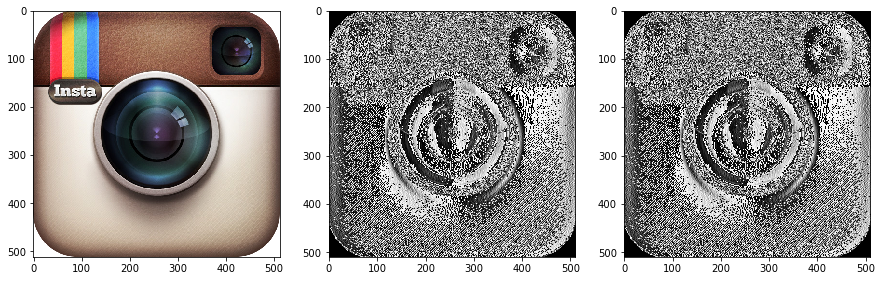

In [5]:
# TF CONV
img_tensor = tf.Variable(np.expand_dims(img.astype(np.float32), axis=0))
kernel_tensor = tf.Variable(kernel.astype(np.float32))
conv_tensor = tf.nn.conv2d(img_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='VALID')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tf_result = sess.run(conv_tensor)
tf_result = tf_result[0]
    
# My CONV
my_result = conv2d(img, kernel)
    
print("MyConvResult:", my_result.shape)
print("TFConvResult:", tf_result.shape)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(img[:, :, ::-1])
plt.subplot(1, 3, 2)
plt.imshow(my_result)
plt.subplot(1, 3, 3)
plt.imshow(tf_result)
plt.show()

In [6]:
img = cv2.imread('s.png')
kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel = np.array([kernel, kernel, kernel])
kernel = np.array([kernel, kernel, kernel])
kernel_x = np.transpose(kernel, axes=(3, 2, 1, 0))
kernel_y = np.transpose(kernel_x, axes=(1, 0, 2, 3))
print(kernel_x[:, :, 0, 0])
print(kernel_y[:, :, 0, 0])

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


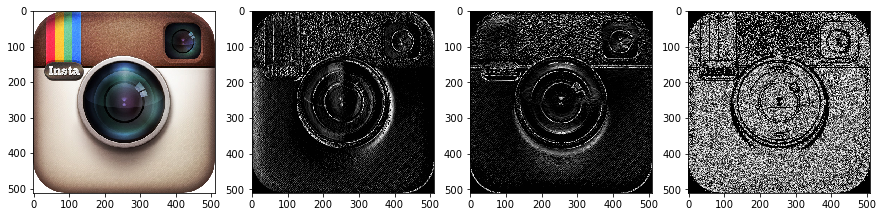

In [7]:
img_x = conv2d(img, kernel_x)
img_x_copy = img_x.copy()
img_x_copy[img_x_copy>img_x_copy.mean()] = 255

img_y = conv2d(img, kernel_y)
img_y_copy = img_y.copy()
img_y_copy[img_y_copy>img_y_copy.mean()] = 255

img_xy = np.sqrt(img_x**2 + img_y**2)
img_xy[img_xy>img_xy.mean()] = 255

plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
plt.imshow(img[:, :, ::-1])
plt.subplot(1, 4, 2)
plt.imshow(img_x_copy)
plt.subplot(1, 4, 3)
plt.imshow(img_y_copy)
plt.subplot(1, 4, 4)
plt.imshow(img_xy)
plt.show()